Este notebook es para validar visualmente que los datos PIB son correctos.

In [2]:
import pandas as pd
import os
from typing import List, Sequence, Optional
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from statsmodels.formula.api import ols
import re
from backend.cuentas_nacionales.pib import PIBViews
from backend.cuentas_nacionales.pib.pib_constantes import ConstantesPIB as C
from backend.political_terms import tag_politics
from backend.plots import plot_timeseries_bars, plot_bar_subplots_by_administration

In [3]:
g = lambda x: x.map(lambda x:x if type(x) == str else '{:,.2f}'.format(x))

year_on_year_changes = lambda df, q: (df.pct_change(q) * 100).dropna()

In [4]:
# pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

In [5]:
folder = r'C:\Users\adolj\OneDrive\Documentos\APPS\informed_economist\data\raw'
file_name = 'Variables_PIB_TC.xlsx'
input_path = os.path.join(folder, file_name)
dic_0 = pd.read_excel(input_path, sheet_name = None)

# datos en niveles (millones de colones)
quarterly_data_levels_TC = dic_0['pibQ'].copy()
quarterly_data_levels_TC.set_index('fecha', inplace = True)

# objeto PIBViews sobre datos en niveles
tipo = '_TC'
ob_pibv = PIBViews(quarterly_data_levels_TC, series_type = tipo)

# objeto PIBViews sobre datos en tasas de crecimiento interanual
yoy_df = round(year_on_year_changes(quarterly_data_levels_TC, 4), 2)
tipo = '_TC'
ob_pibv_yoy = PIBViews(yoy_df, series_type = tipo)

In [6]:
quarterly_data_levels_TC.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 138 entries, 1991-03-31 to 2025-06-30
Data columns (total 45 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   PIB_TC                                       138 non-null    float64
 1   PIB_Impuestos_TC                             138 non-null    float64
 2   PIB_Valor_Agregado_TC                        138 non-null    float64
 3   PIB_Agricultura_Silvicultura_Pesca_TC        138 non-null    float64
 4   PIB_Minas_Canteras_TC                        138 non-null    float64
 5   PIB_Manufactura_TC                           138 non-null    float64
 6   PIB_Electricidad_Agua_Saneamiento_TC         138 non-null    float64
 7   PIB_Construccion_TC                          138 non-null    float64
 8   PIB_Comercio_TC                              138 non-null    float64
 9   PIB_Transporte_Almacenamiento_TC             138 non-null

In [7]:
g(quarterly_data_levels_TC.head())

,PIB_TC,PIB_Impuestos_TC,PIB_Valor_Agregado_TC,PIB_Agricultura_Silvicultura_Pesca_TC,PIB_Minas_Canteras_TC,PIB_Manufactura_TC,PIB_Electricidad_Agua_Saneamiento_TC,PIB_Construccion_TC,PIB_Comercio_TC,PIB_Transporte_Almacenamiento_TC,PIB_Hoteles_Restaurantes_TC,PIB_Informacion_Comunicaciones_TC,PIB_Financieras_Seguros_TC,PIB_Inmobiliario_TC,PIB_Actividades_Profesionales_TC,PIB_Administracion_Publica_TC,PIB_Ense_Salud_Asistencia_Social_TC,PIB_Otras_Actividades_TC,PIB_Demanda_Interna_TC,PIB_Gasto_Consumo_Final_TC,PIB_Gasto_Consumo_Final_Hogares_TC,PIB_Bienes_Consumo_Duradero_TC,PIB_Bienes_Consumo_Semi_Duraderos_TC,PIB_Bienes_Consumo_No_Duraderos_TC,PIB_Servicios_TC,PIB_Gasto_Consumo_Final_Gobierno_General_TC,PIB_Formacion_Bruta_Capital_Fijo_TC,PIB_Maquinaria_Equipo_TC,PIB_Nuevas_Construcciones_TC,PIB_Exportaciones_Bienes_Servicios_TC,PIB_Exportaciones_Bienes_TC,PIB_Exportaciones_Servicios_TC,PIB_Exportacion_Bienes_RegDef_TC,PIB_Exportacion_Bienes_RegEsp_TC,PIB_Importaciones_Bienes_Servicios_TC,PIB_Importaciones_Bienes_TC,PIB_Importaciones_Servicios_TC,PIB_Importacion_Bienes_RegDef_TC,PIB_Importacion_Bienes_RegEsp_TC,PIB_Combustibles_TC,PIB_Sin_Combustibles_TC,PIB_RegDef_TC,PIB_RegEsp_TC,PIB_Terminos_Intercambio,PIB_USD
fecha,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1991-03-31,"2,635,510.73","172,872.44","2,470,845.86","186,159.91","14,918.28","515,563.32","72,668.18","114,559.06","324,523.03","169,897.13","79,146.89","14,630.94","55,279.91","123,716.92","90,639.02","244,194.77","514,587.49","120,266.34","2,653,443.56","2,320,055.40","1,694,814.17","40,932.12","104,839.15","798,564.72","820,576.91","710,258.14","346,160.83","195,059.14","142,421.28","561,354.26","384,126.81","145,555.05","350,683.53","66,583.35","564,149.04","446,842.51","132,642.57","358,299.39","89,788.06","123,909.70","268,123.11","2,559,982.64","53,619.65",80.28,"1,934.18"
1991-06-30,"2,673,943.81","177,991.09","2,498,014.16","183,135.76","15,430.30","521,214.71","74,789.77","119,329.49","331,478.97","170,832.29","80,520.67","15,092.72","52,605.90","125,562.02","91,684.42","244,999.73","518,319.36","120,484.88","2,694,347.74","2,358,371.74","1,724,688.75","42,565.38","106,259.89","821,621.74","820,860.43","713,859.00","345,285.88","184,993.60","150,666.81","587,802.17","402,900.02","157,379.19","364,186.94","71,603.98","596,940.01","462,897.49","140,110.80","373,460.86","92,592.96","129,696.90","281,501.67","2,594,045.04","57,425.61",90.63,"1,740.47"
1991-09-30,"2,720,920.54","183,544.58","2,538,215.97","186,569.74","15,738.54","534,732.06","76,203.10","124,469.15","336,851.39","172,471.00","82,382.14","15,303.54","50,247.07","128,147.89","92,332.49","245,955.42","522,552.47","120,582.43","2,739,490.04","2,383,089.05","1,750,583.60","44,206.29","106,902.11","838,229.36","820,044.36","717,433.70","350,159.25","181,988.38","158,106.41","614,133.36","422,432.01","169,948.54","377,065.42","77,640.17","625,699.72","473,852.91","148,905.42","383,186.23","95,258.14","134,279.41","293,397.83","2,636,616.24","60,523.87",89.14,"1,709.24"
1991-12-31,"2,784,461.84","191,590.62","2,597,398.52","192,836.64","16,176.43","557,131.33","77,817.10","130,268.32","344,431.56","174,576.80","85,045.50","15,441.48","49,617.58","131,785.91","94,032.32","247,321.26","527,862.66","120,768.97","2,805,393.88","2,423,285.27","1,785,653.85","47,125.11","108,151.98","856,195.79","830,239.55","721,753.76","370,006.09","193,861.17","165,635.42","643,144.28","444,132.17","180,701.29","390,775.55","85,069.52","654,809.31","481,181.17","158,304.54","388,368.08","97,808.42","137,879.84","300,399.73","2,696,004.16","63,770.37",98.14,"1,831.83"
1992-03-31,"2,852,136.48","200,264.81","2,656,824.45","195,711.24","16,977.31","571,209.01","79,002.85","136,016.81","354,385.29","176,745.51","88,231.97","15,646.81","50,875.89","136,776.28","97,288.91","249,024.08","534,662.83","121,339.37","2,884,965.68","2,481,952.26","1,830,871.46","51,253.10","111,159.20","878,351.56","851,094.62","727,477.45","399,1

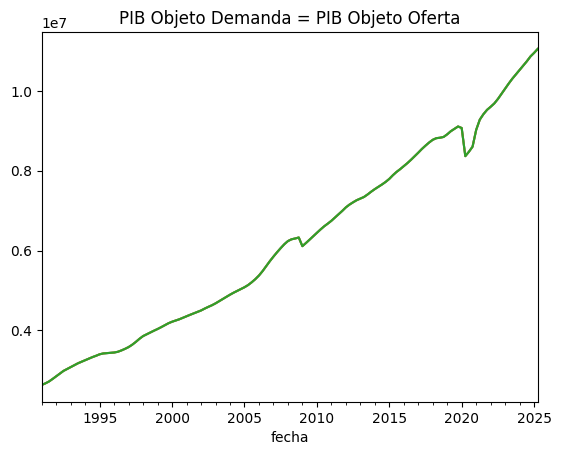

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 138 entries, 1991-03-31 to 2025-06-30
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   PIB_TC                 138 non-null    float64
 1   PIB_Valor_Agregado_TC  138 non-null    float64
 2   PIB_Impuestos_TC       138 non-null    float64
dtypes: float64(3)
memory usage: 4.3 KB


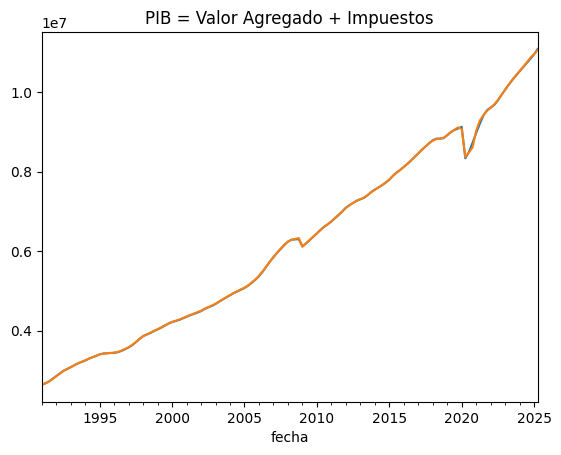

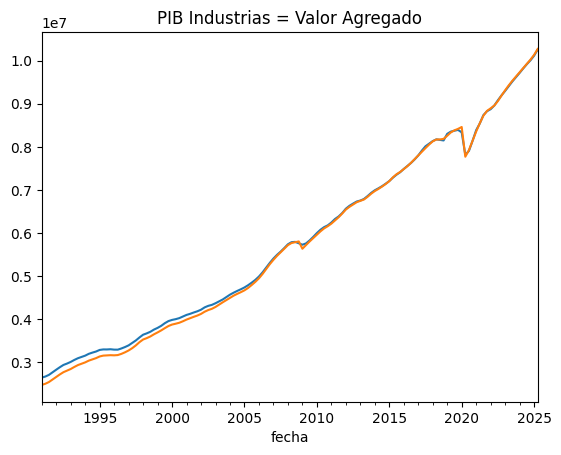

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 138 entries, 1991-03-31 to 2025-06-30
Data columns (total 5 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   PIB_Minas_Canteras_TC                 138 non-null    float64
 1   PIB_Manufactura_TC                    138 non-null    float64
 2   PIB_Electricidad_Agua_Saneamiento_TC  138 non-null    float64
 3   PIB_Construccion_TC                   138 non-null    float64
 4   Industria_Ampliada_TC                 138 non-null    float64
dtypes: float64(5)
memory usage: 6.5 KB


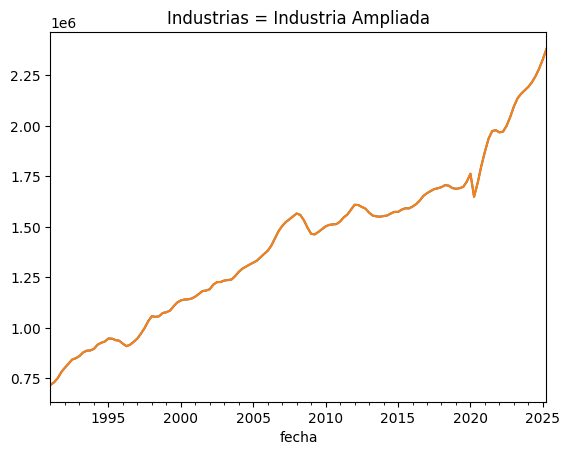

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 138 entries, 1991-03-31 to 2025-06-30
Data columns (total 11 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   PIB_Comercio_TC                      138 non-null    float64
 1   PIB_Transporte_Almacenamiento_TC     138 non-null    float64
 2   PIB_Hoteles_Restaurantes_TC          138 non-null    float64
 3   PIB_Informacion_Comunicaciones_TC    138 non-null    float64
 4   PIB_Financieras_Seguros_TC           138 non-null    float64
 5   PIB_Inmobiliario_TC                  138 non-null    float64
 6   PIB_Actividades_Profesionales_TC     138 non-null    float64
 7   PIB_Administracion_Publica_TC        138 non-null    float64
 8   PIB_Ense_Salud_Asistencia_Social_TC  138 non-null    float64
 9   PIB_Otras_Actividades_TC             138 non-null    float64
 10  Servicios_TC                         138 non-null    float64
dtypes: float64(11

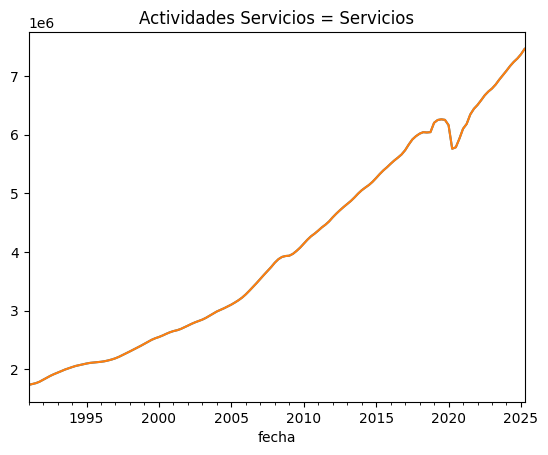

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 138 entries, 1991-03-31 to 2025-06-30
Data columns (total 3 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   PIB_Importacion_Bienes_RegDef_TC  138 non-null    float64
 1   PIB_Combustibles_TC               138 non-null    float64
 2   PIB_Sin_Combustibles_TC           138 non-null    float64
dtypes: float64(3)
memory usage: 4.3 KB


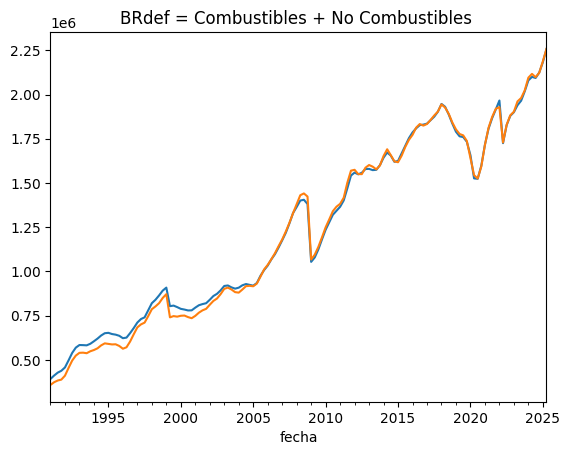

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 138 entries, 1991-03-31 to 2025-06-30
Data columns (total 3 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   PIB_Importaciones_Bienes_TC       138 non-null    float64
 1   PIB_Importacion_Bienes_RegDef_TC  138 non-null    float64
 2   PIB_Importacion_Bienes_RegEsp_TC  138 non-null    float64
dtypes: float64(3)
memory usage: 4.3 KB


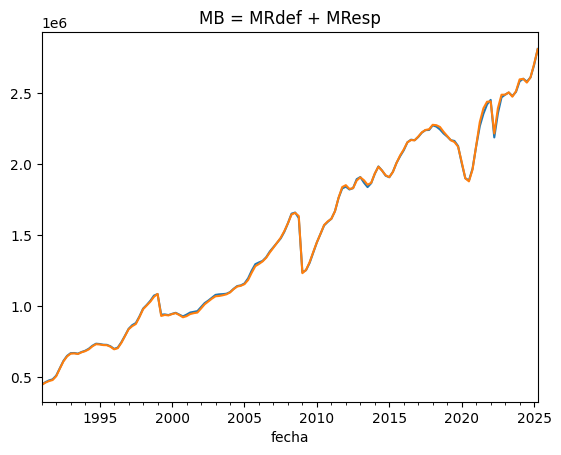

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 138 entries, 1991-03-31 to 2025-06-30
Data columns (total 3 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   PIB_Importaciones_Bienes_Servicios_TC  138 non-null    float64
 1   PIB_Importaciones_Bienes_TC            138 non-null    float64
 2   PIB_Importaciones_Servicios_TC         138 non-null    float64
dtypes: float64(3)
memory usage: 4.3 KB


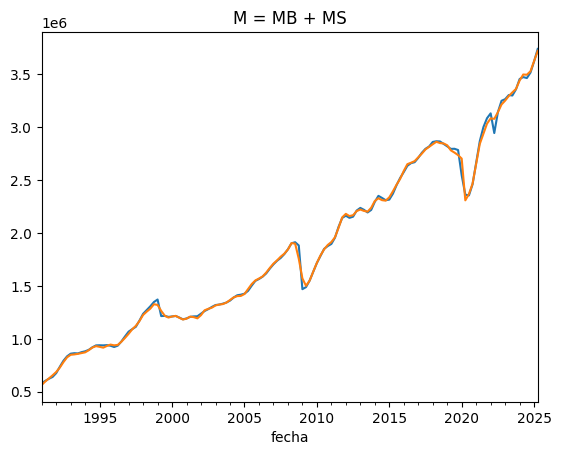

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 138 entries, 1991-03-31 to 2025-06-30
Data columns (total 3 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   PIB_Exportaciones_Bienes_TC       138 non-null    float64
 1   PIB_Exportacion_Bienes_RegDef_TC  138 non-null    float64
 2   PIB_Exportacion_Bienes_RegEsp_TC  138 non-null    float64
dtypes: float64(3)
memory usage: 4.3 KB


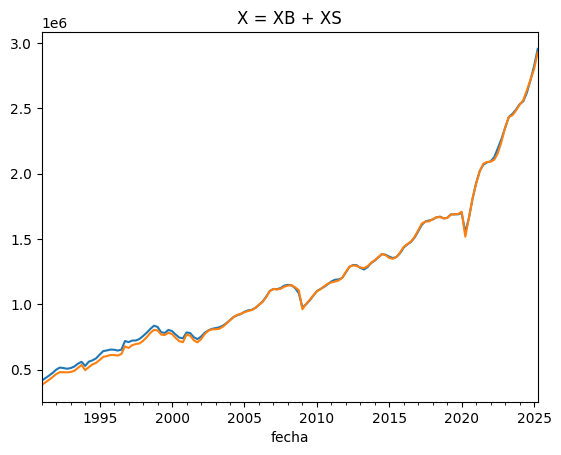

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 138 entries, 1991-03-31 to 2025-06-30
Data columns (total 3 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   PIB_Exportaciones_Bienes_Servicios_TC  138 non-null    float64
 1   PIB_Exportaciones_Bienes_TC            138 non-null    float64
 2   PIB_Exportaciones_Servicios_TC         138 non-null    float64
dtypes: float64(3)
memory usage: 4.3 KB


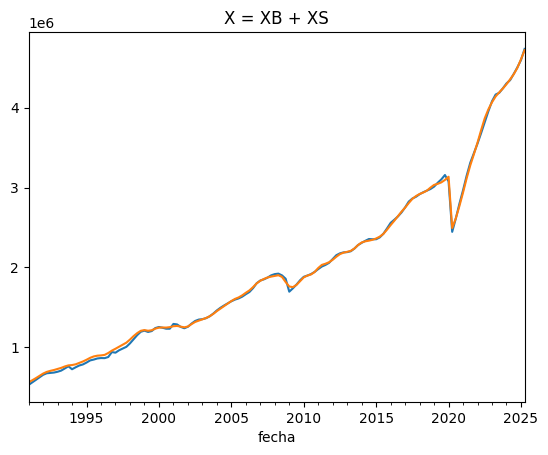

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 138 entries, 1991-03-31 to 2025-06-30
Data columns (total 3 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   PIB_Formacion_Bruta_Capital_Fijo_TC  138 non-null    float64
 1   PIB_Maquinaria_Equipo_TC             138 non-null    float64
 2   PIB_Nuevas_Construcciones_TC         138 non-null    float64
dtypes: float64(3)
memory usage: 4.3 KB


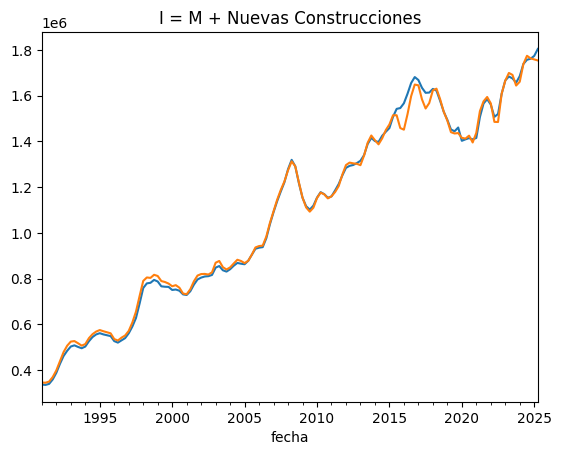

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 138 entries, 1991-03-31 to 2025-06-30
Data columns (total 5 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   PIB_Gasto_Consumo_Final_Hogares_TC    138 non-null    float64
 1   PIB_Bienes_Consumo_Duradero_TC        138 non-null    float64
 2   PIB_Bienes_Consumo_Semi_Duraderos_TC  138 non-null    float64
 3   PIB_Bienes_Consumo_No_Duraderos_TC    138 non-null    float64
 4   PIB_Servicios_TC                      138 non-null    float64
dtypes: float64(5)
memory usage: 6.5 KB


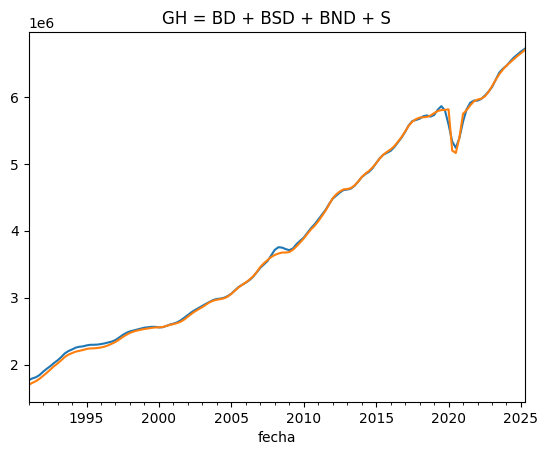

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 138 entries, 1991-03-31 to 2025-06-30
Data columns (total 3 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   PIB_Gasto_Consumo_Final_TC                   138 non-null    float64
 1   PIB_Gasto_Consumo_Final_Hogares_TC           138 non-null    float64
 2   PIB_Gasto_Consumo_Final_Gobierno_General_TC  138 non-null    float64
dtypes: float64(3)
memory usage: 4.3 KB


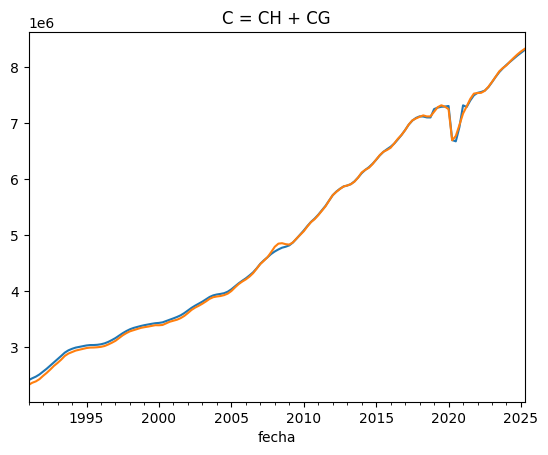

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 138 entries, 1991-03-31 to 2025-06-30
Data columns (total 6 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   PIB_TC                                       138 non-null    float64
 1   PIB_Gasto_Consumo_Final_Hogares_TC           138 non-null    float64
 2   PIB_Gasto_Consumo_Final_Gobierno_General_TC  138 non-null    float64
 3   PIB_Formacion_Bruta_Capital_Fijo_TC          138 non-null    float64
 4   PIB_Exportaciones_Bienes_Servicios_TC        138 non-null    float64
 5   PIB_Importaciones_Bienes_Servicios_TC        138 non-null    float64
dtypes: float64(6)
memory usage: 7.5 KB


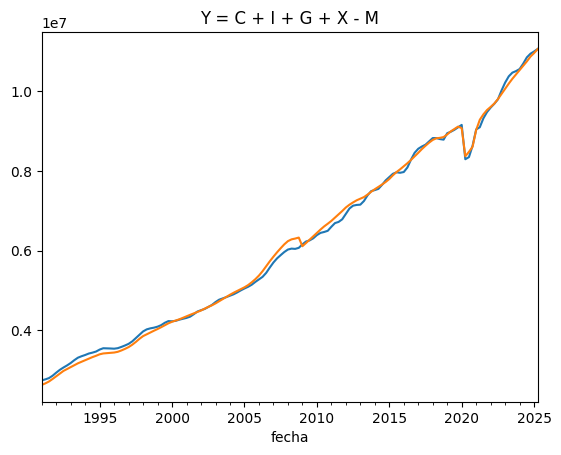

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 138 entries, 1991-03-31 to 2025-06-30
Data columns (total 3 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   PIB_Gasto_Consumo_Final_Hogares_TC           138 non-null    float64
 1   PIB_Gasto_Consumo_Final_Gobierno_General_TC  138 non-null    float64
 2   PIB_Formacion_Bruta_Capital_Fijo_TC          138 non-null    float64
dtypes: float64(3)
memory usage: 4.3 KB


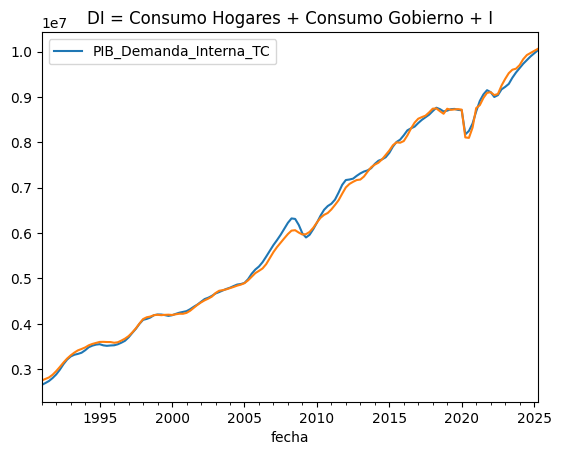

In [8]:
ob_pibv.demanda.get_categorias_principales()['PIB_TC'].plot()
ob_pibv.demanda.get_pib().squeeze().plot()
ob_pibv.oferta.get_pib().squeeze().plot()
plt.title('PIB Objeto Demanda = PIB Objeto Oferta')
plt.show()

#==============================================================================================================
# Validaciones de Oferta
#==============================================================================================================

# PIB = Valor Agregado + Impuestos 
tipo = '_TC'
ob_pibv = PIBViews(quarterly_data_levels_TC, series_type = tipo)
df = ob_pibv.oferta.get_categorias_principales()
df.info()
col_total = 'PIB' + tipo
df_2 = df.drop(col_total, axis = 1)
df_2.sum(axis = 1).plot()
df[col_total].plot()
plt.title('PIB = Valor Agregado + Impuestos')
plt.show()


tipo = '_TC'
ob_pibv = PIBViews(quarterly_data_levels_TC, series_type = tipo)
df1 = ob_pibv.oferta.get_industrias()
df1.sum(axis = 1).plot()
df2 = ob_pibv.oferta.get_valor_agregado().squeeze()
df2.plot()
plt.title('PIB Industrias = Valor Agregado')
plt.show()

tipo = '_TC'
ob_pibv = PIBViews(quarterly_data_levels_TC, series_type = tipo)
df = ob_pibv.oferta.get_industria_ampliada()
df.info()
col_total = 'Industria_Ampliada' + tipo
df_2 = df.drop(col_total, axis = 1)
df_2.sum(axis = 1).plot()
df[col_total].plot()
plt.title('Industrias = Industria Ampliada')
plt.show()

tipo = '_TC'
ob_pibv = PIBViews(quarterly_data_levels_TC, series_type = tipo)
df = ob_pibv.oferta.get_servicios()
df.info()
col_total = 'Servicios' + tipo
df_2 = df.drop(col_total, axis = 1)
df_2.sum(axis = 1).plot()
df[col_total].plot()
plt.title('Actividades Servicios = Servicios')
plt.show()

#==============================================================================================================
# Validaciones de Demanda
#==============================================================================================================


# validación MBRdef = Combustibles + No Combustibles 
tipo = '_TC'
ob_pibv = PIBViews(quarterly_data_levels_TC, series_type = tipo)
df = ob_pibv.demanda.get_importaciones_bienes_regimen_def()
df.info()
col_total = 'PIB_Importacion_Bienes_RegDef' + tipo
df_2 = df.drop(col_total, axis = 1)
df_2.sum(axis = 1).plot()
df[col_total].plot()
plt.title('BRdef = Combustibles + No Combustibles ')
plt.show()



# validación MB = MRdef + MResp 
tipo = '_TC'
ob_pibv = PIBViews(quarterly_data_levels_TC, series_type = tipo)
df = ob_pibv.demanda.get_importaciones_bienes()
df.info()
col_total = 'PIB_Importaciones_Bienes' + tipo
df_2 = df.drop(col_total, axis = 1)
df_2.sum(axis = 1).plot()
df[col_total].plot()
plt.title('MB = MRdef + MResp')
plt.show()


# validación M = MB + MS 
tipo = '_TC'
ob_pibv = PIBViews(quarterly_data_levels_TC, series_type = tipo)
df = ob_pibv.demanda.get_importaciones()
df.info()
col_total = 'PIB_Importaciones_Bienes_Servicios' + tipo
df_2 = df.drop(col_total, axis = 1)
df_2.sum(axis = 1).plot()
df[col_total].plot()
plt.title('M = MB + MS')
plt.show()


# validación XB = XB Rdeg + XS Resp
tipo = '_TC'
ob_pibv = PIBViews(quarterly_data_levels_TC, series_type = tipo)
df = ob_pibv.demanda.get_exportaciones_bienes()
df.info()
col_total = 'PIB_Exportaciones_Bienes' + tipo
df_2 = df.drop(col_total, axis = 1)
df_2.sum(axis = 1).plot()
df[col_total].plot()
plt.title('X = XB + XS')
plt.show()


# validación X = XB + XS
tipo = '_TC'
ob_pibv = PIBViews(quarterly_data_levels_TC, series_type = tipo)
df = ob_pibv.demanda.get_exportaciones()
df.info()
col_total = 'PIB_Exportaciones_Bienes_Servicios' + tipo
df_2 = df.drop(col_total, axis = 1)
df_2.sum(axis = 1).plot()
df[col_total].plot()
plt.title('X = XB + XS')
plt.show()


# validación I = Maquinaria + Nuevas Construcciones
tipo = '_TC'
ob_pibv = PIBViews(quarterly_data_levels_TC, series_type = tipo)
df = ob_pibv.demanda.get_inversion()
df.info()
col_total = 'PIB_Formacion_Bruta_Capital_Fijo' + tipo
df_2 = df.drop(col_total, axis = 1)
df_2.sum(axis = 1).plot()
df[col_total].plot()
plt.title('I = M + Nuevas Construcciones')
plt.show()


# validación CH = BD + BSD + BND + S
tipo = '_TC'
ob_pibv = PIBViews(quarterly_data_levels_TC, series_type = tipo)
df = ob_pibv.demanda.get_consumo_hogares()
df.info()
col_total = 'PIB_Gasto_Consumo_Final_Hogares' + tipo
df_2 = df.drop(col_total, axis = 1)
df_2.sum(axis = 1).plot()
df[col_total].plot()
plt.title('GH = BD + BSD + BND + S')
plt.show()


# validación Consumo Final = C Hogares + C Gobierno
tipo = '_TC'
ob_pibv = PIBViews(quarterly_data_levels_TC, series_type = tipo)
df = ob_pibv.demanda.get_consumo()
df.info()
col_total = 'PIB_Gasto_Consumo_Final' + tipo
df_2 = df.drop(col_total, axis = 1)
df_2.sum(axis = 1).plot()
df[col_total].plot()
plt.title('C = CH + CG')
plt.show()


# validación Y = C + I + G + X - M
tipo = '_TC'
ob_pibv = PIBViews(quarterly_data_levels_TC, series_type = tipo)
df = ob_pibv.demanda.get_categorias_principales()
df.info()
df_2 = df.drop('PIB' + tipo, axis = 1)
df_2['PIB_Importaciones_Bienes_Servicios' + tipo] = -1 * df_2['PIB_Importaciones_Bienes_Servicios' + tipo]
df_2.sum(axis = 1).plot()
df['PIB' + tipo].plot()
plt.title('Y = C + I + G + X - M')
plt.show()


# Validación: Demanda Intera = C + G + I
tipo = '_TC'
df1 = quarterly_data_levels_TC
ob_pibv = PIBViews(df1, series_type = tipo)
df = ob_pibv.demanda.get_demanda_interna()
df.info()
df1.filter(regex = C.DEMANDA_INTERNA + tipo).plot()
df.sum(axis = 1).plot()
plt.title('DI = Consumo Hogares + Consumo Gobierno + I')
plt.show()